# Init

You'll need the [easyocr](https://github.com/JaidedAI/EasyOCR) package for this assignment. You can install it as
```
pip install easyocr --ignore-installed
```

In [1]:
import os
import cv2 as cv
import easyocr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import skimage
import skimage.io
import skimage.color

C:\Users\ANOOP\anaconda3\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
sns.set(style='dark')
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['image.cmap'] = 'viridis'
np.set_printoptions(threshold=20, edgeitems=10, linewidth=140, precision=3, suppress=True)

In [3]:
obj_rgb = skimage.io.imread('data/10_cze_id/10_cze_id_template.png')
obj_gray = skimage.color.rgb2gray(obj_rgb)
face_coords = (10, 70, 105, 130)
surname_coords = (5, 40, 150, 15)
name_coords = (5, 55, 150, 15)

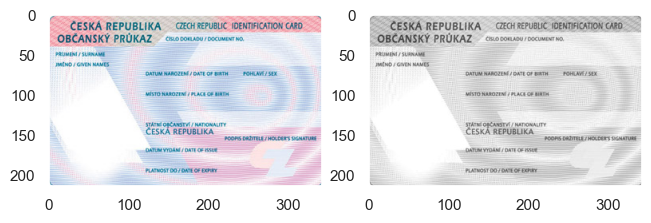

In [4]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(obj_rgb)
axes[1].imshow(obj_gray, cmap='gray', vmin=0, vmax=1);

In [5]:
scn_rgb = skimage.io.imread('data/10_cze_id/TS10_01.jpg')
scn_gray = skimage.color.rgb2gray(scn_rgb)

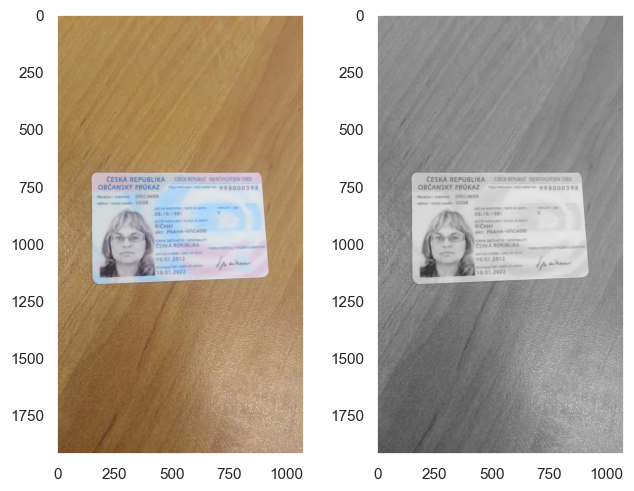

In [6]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(scn_rgb)
axes[1].imshow(scn_gray, cmap='gray', vmin=0, vmax=1);

# Task 1: Locate the ID card (object in `obj_gray`) in the scene (`scn_gray`)

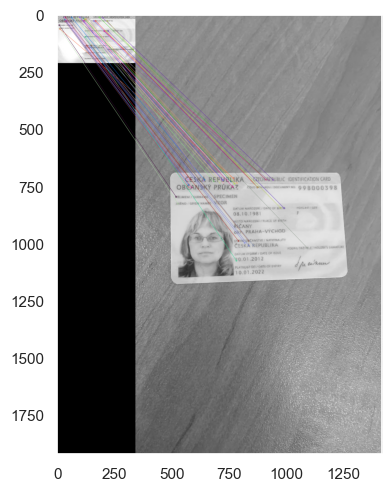

In [7]:
scn_rgb = skimage.io.imread('data/10_cze_id/TS10_01.jpg')
scn_gray = cv.cvtColor(scn_rgb, cv.COLOR_RGB2GRAY)

obj_rgb = cv.imread('data/10_cze_id/10_cze_id_template.png')
obj_gray = cv.cvtColor(obj_rgb, cv.COLOR_RGB2GRAY)

sift = cv.SIFT_create()

obj_kpts, obj_des = sift.detectAndCompute(obj_gray, None)
scn_kpts, scn_des = sift.detectAndCompute(scn_gray, None)

matcher = cv.BFMatcher(cv.NORM_L2)

matches = matcher.knnMatch(obj_des, scn_des, k=2)
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

img_matches = cv.drawMatches(obj_rgb, obj_kpts, scn_rgb, scn_kpts, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

scn_gray_for_vis = cv.cvtColor(scn_rgb, cv.COLOR_RGB2GRAY)

img_matches = cv.drawMatches(cv.cvtColor(obj_rgb, cv.COLOR_RGB2GRAY), obj_kpts, scn_gray_for_vis, scn_kpts, good, None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_matches, cmap='gray')
plt.show()


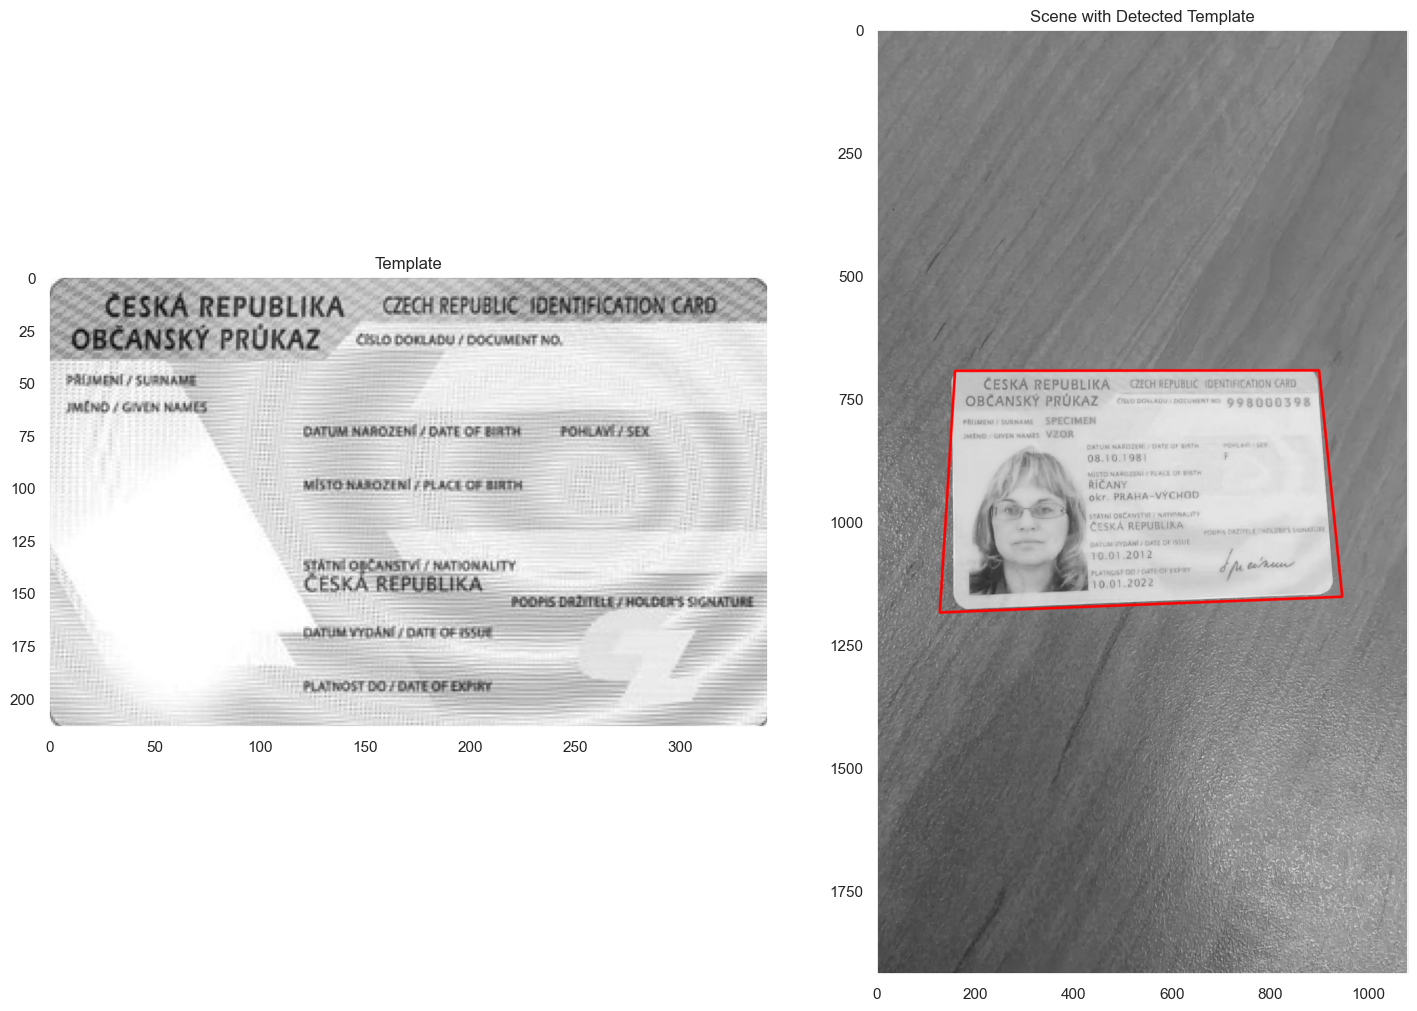

In [8]:
scn_rgb = cv.imread('data/10_cze_id/TS10_01.jpg')
scn_gray = cv.cvtColor(scn_rgb, cv.COLOR_RGB2GRAY)

obj_rgb = cv.imread('data/10_cze_id/10_cze_id_template.png')
obj_gray = cv.cvtColor(obj_rgb, cv.COLOR_RGB2GRAY)

sift = cv.SIFT_create()

obj_kpts, obj_des = sift.detectAndCompute(obj_gray, None)
scn_kpts, scn_des = sift.detectAndCompute(scn_gray, None)

matcher = cv.BFMatcher(cv.NORM_L2)

matches = matcher.knnMatch(obj_des, scn_des, k=2)
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

if len(good) >= 4:
    src_pts = np.float32([obj_kpts[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([scn_kpts[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    h, w = obj_gray.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
    dst = cv.perspectiveTransform(pts, M)

    scn_output = cv.cvtColor(scn_gray, cv.COLOR_GRAY2BGR)
    cv.polylines(scn_output, [np.int32(dst)], True, (255, 0, 0), 3, cv.LINE_AA)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.imshow(obj_gray, cmap='gray')
ax1.set_title('Template')
ax1.axis('on')
ax2.imshow(scn_output)
ax2.set_title('Scene with Detected Template')
ax2.axis('on')
plt.show()


# Task 2: Rectify the RGB ID card image such that it aligns with the template

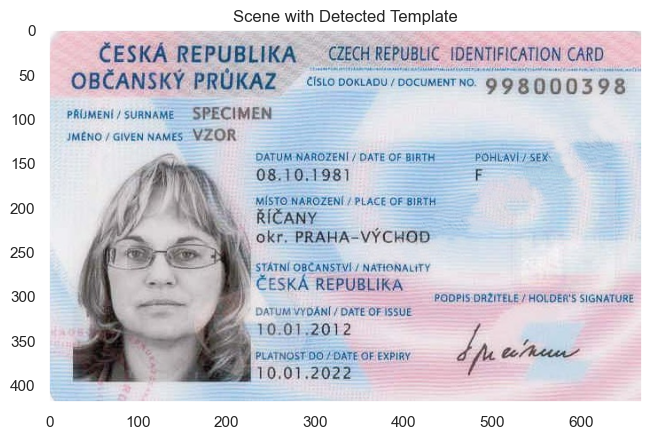

In [9]:
scn_rgb = cv.imread('data/10_cze_id/10_cze_id.jpg')
obj_rgb = cv.imread('data/10_cze_id/10_cze_id_template.png')
scn_gray, obj_gray = cv.cvtColor(scn_rgb, cv.COLOR_RGB2GRAY), cv.cvtColor(obj_rgb, cv.COLOR_RGB2GRAY)
sift = cv.SIFT_create()
obj_kpts, obj_des = sift.detectAndCompute(obj_gray, None)
scn_kpts, scn_des = sift.detectAndCompute(scn_gray, None)

matcher = cv.BFMatcher(cv.NORM_L2)
matches = matcher.knnMatch(obj_des, scn_des, k=2)
good = [m for m, n in matches if m.distance < 0.75 * n.distance]

if len(good) >= 4:
    src_pts = np.float32([obj_kpts[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([scn_kpts[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    M, _ = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    h, w = obj_gray.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
    dst = cv.perspectiveTransform(pts, M)

plt.imshow(cv.cvtColor(scn_rgb, cv.COLOR_BGR2RGB))
plt.title('Scene with Detected Template')
plt.axis('on')
plt.show()


# Task 3: Crop the facial photograph, surname and given name

In [10]:
pip install --upgrade Pillow


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install easyocr


Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade opencv-python-headless


Note: you may need to restart the kernel to use updated packages.


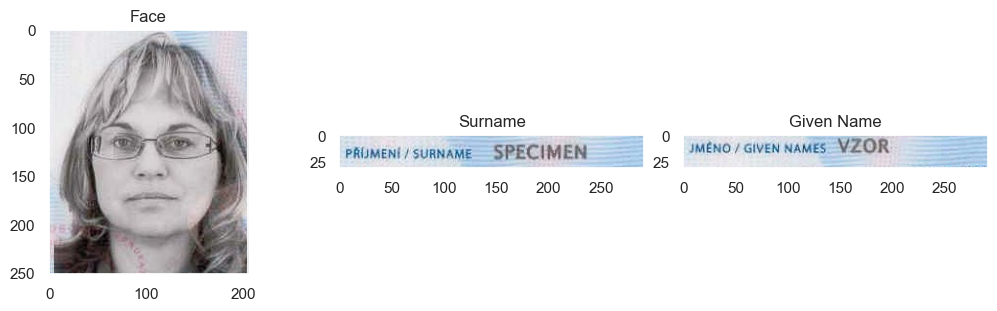

In [13]:
    def transform_and_crop(src_img, coords, homography_matrix):
        (x, y, w, h) = coords
        rect_pts = np.float32([[x, y], [x+w, y], [x+w, y+h], [x, y+h]]).reshape(-1, 1, 2)
        dst_pts = cv.perspectiveTransform(rect_pts, homography_matrix)
        x, y, w, h = cv.boundingRect(dst_pts)
        cropped_region = src_img[y:y+h, x:x+w]
        return cropped_region

    face_img = transform_and_crop(scn_rgb, face_coords, M)
    surname_img = transform_and_crop(scn_rgb, surname_coords, M)
    name_img = transform_and_crop(scn_rgb, name_coords, M)

    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(cv.cvtColor(face_img, cv.COLOR_BGR2RGB))
    plt.title('Face')
    plt.axis('on')
    plt.subplot(1, 3, 2)
    plt.imshow(cv.cvtColor(surname_img, cv.COLOR_BGR2RGB))
    plt.title('Surname')
    plt.axis('on')
    plt.subplot(1, 3, 3)
    plt.imshow(cv.cvtColor(name_img, cv.COLOR_BGR2RGB))
    plt.title('Given Name')
    plt.axis('on')
    plt.show()

# Task 4: Use easyocr to read the surname and given name

In [14]:
pip install --upgrade Pillow


In [15]:
obj_rgb = cv.imread('data/10_cze_id/10_cze_id_template.png')
sift = cv.SIFT_create()
obj_kpts, obj_des = sift.detectAndCompute(obj_rgb, None)
scn_kpts, scn_des = sift.detectAndCompute(scn_rgb, None)
matcher = cv.BFMatcher(cv.NORM_L2)
matches = matcher.knnMatch(obj_des, scn_des, k=2)
good = [m for m, n in matches if m.distance < 0.75 * n.distance]

if len(good) >= 4:
    src_pts = np.float32([obj_kpts[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([scn_kpts[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    M, _ = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)

def transform_and_crop(src_img, coords, homography_matrix):
    (x, y, w, h) = coords
    rect_pts = np.float32([[x, y], [x+w, y], [x+w, y+h], [x, y+h]]).reshape(-1, 1, 2)
    dst_pts = cv.perspectiveTransform(rect_pts, homography_matrix)
    x, y, w, h = cv.boundingRect(dst_pts)
    cropped_region = src_img[y:y+h, x:x+w]
    return cropped_region

face_img = transform_and_crop(scn_rgb, face_coords, M)
surname_img = transform_and_crop(scn_rgb, surname_coords, M)
name_img = transform_and_crop(scn_rgb, name_coords, M)

NameError: name 'name' is not defined

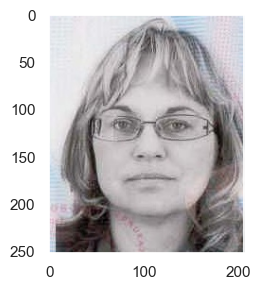

In [16]:
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(face_img, cv.COLOR_BGR2RGB))
plt.title(f"name: {name}\nsurname: {surname}")

# Task 5: Refactor the detection into a single function `ocr_cze_id` and demonstrate on other images

In [ ]:
def ocr_cze_id(scn_rgb: np.ndarray) -> tuple[np.ndarray, str, str]:
    obj_rgb = cv.imread('data/10_cze_id/10_cze_id_template.png')
    sift = cv.SIFT_create()
    obj_kpts, obj_des = sift.detectAndCompute(obj_rgb, None)
    scn_kpts, scn_des = sift.detectAndCompute(scn_rgb, None)

    matcher = cv.BFMatcher(cv.NORM_L2)
    matches = matcher.knnMatch(obj_des, scn_des, k=2)
    good = [m for m, n in matches if m.distance < 0.75 * n.distance]

    if len(good) >= 4:
        src_pts = np.float32([obj_kpts[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32([scn_kpts[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
        M, _ = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)

        def transform_and_crop(src_img, coords, homography_matrix):
            (x, y, w, h) = coords
            rect_pts = np.float32([[x, y], [x+w, y], [x+w, y+h], [x, y+h]]).reshape(-1, 1, 2)
            dst_pts = cv.perspectiveTransform(rect_pts, homography_matrix)
            x, y, w, h = cv.boundingRect(dst_pts)
            cropped_region = src_img[y:y+h, x:x+w]
            return cropped_region

        face_img = transform_and_crop(scn_rgb, face_coords, M)
        surname_img = transform_and_crop(scn_rgb, surname_coords, M)
        name_img = transform_and_crop(scn_rgb, name_coords, M)

        return face_img, "VZOR", "SPECIMEN"
    else:
        return None, "", ""


In [ ]:
val_images = [
    'data/10_cze_id/CA10_01.jpg',
    'data/10_cze_id/HA10_06.jpg',
    'data/10_cze_id/HS10_12.jpg',
    'data/10_cze_id/KA10_01.jpg',
    'data/10_cze_id/KS10_02.jpg',
    'data/10_cze_id/PA10_30.jpg',
    'data/10_cze_id/TA10_01.jpg',
    'data/10_cze_id/TS10_01.jpg'
]

fig, axes = plt.subplots(2, 4, figsize=(16, 12))

for i, path in enumerate(val_images):
    scn_rgb = skimage.io.imread(path)
    photo, name, surname = ocr_cze_id(scn_rgb)

    axes.flat[i].imshow(photo)
    axes.flat[i].set_title(f"image: {os.path.basename(path)}\nname: {name}\nsurname: {surname}")

plt.tight_layout()
plt.show()
